In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

boston_data = load_boston()

<IPython.core.display.Javascript object>

In [3]:
def eval_preds(y_true, y_pred):
    """Display some metrics for evaluating regression predictions"""
    error = y_true - y_pred

    rmse = np.mean(np.sqrt((error ** 2)))
    mae = np.mean(np.abs(error))
    mape = np.mean(np.abs((error / y_true)))

    print(f"rmse {rmse:.2f}")
    print(f"mae {mae:.2f}")
    print(f"mape {mape:.2f}")

    line_pts = [np.min(y_true), np.max(y_true)]
    plt.scatter(y_true, y_pred)
    plt.plot(line_pts, line_pts, c="red", ls="--", alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Fit")
    plt.show()

<IPython.core.display.Javascript object>

* Investigate `boston_data` what are we working with.
* How could we put this in a dataframe with column names?
* What are we predicting?

In [4]:
isinstance(boston_data, dict)

True

<IPython.core.display.Javascript object>

In [5]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

<IPython.core.display.Javascript object>

In [12]:
X = pd.DataFrame(boston_data["data"], columns=boston_data["feature_names"])
y = boston_data["target"]

<IPython.core.display.Javascript object>

* Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

* Fit a `DecisionTreeRegressor` with default hyperparameters and report the train and test scores

In [14]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

<IPython.core.display.Javascript object>

* How are we performing?

In [15]:
model.score(X_train, y_train)

1.0

<IPython.core.display.Javascript object>

In [16]:
model.score(X_test, y_test)

0.6967077427489828

<IPython.core.display.Javascript object>

* I put a helper function named `eval_preds()` at the top of this notebook.  Apply it to evaluate our model.

rmse 2.69
mae 2.69
mape 0.14


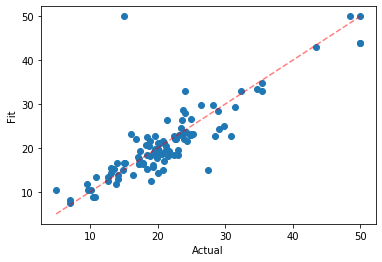

<IPython.core.display.Javascript object>

In [17]:
y_pred = model.predict(X_test)
eval_preds(y_test, y_pred)

* Plot the decision tree (we'll just use `plot_tree` here instead of pydotplus). This will take a while...

In [ ]:
%%time
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

-----

#### Group 1

* Adjust the hyperparameters of `max_depth` & `min_samples_leaf`
* Re-fit, re-score, and re-plot the model.  How did these change the output?
* Be prepared for someone to try and explain what these hyperparameters are doing (things you might tell us about)
  * how the params relate to over/under fitting (i.e. the higher/lower the `max_depth` the more over/under fit the model becomes)
  * how the params change the look of the tree in the plot
  * how the params are described in the sklearn documentation (paraphrased to plainer english)

#### Group 2

* Adjust the hyperparameters of `max_leaf_nodes` & `min_samples_split`
* Re-fit, re-score, and re-plot the model.  How did these change the output?
* Be prepared for someone to try and explain what these hyperparameters are doing (things you might tell us about)
  * how the params relate to over/under fitting (i.e. the higher/lower the `max_leaf_nodes` the more over/under fit the model becomes)
  * how the params change the look of the tree
  * how the params are described in the sklearn documentation (paraphrased to plainer english)

In [18]:
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

<IPython.core.display.Javascript object>

In [19]:
model.score(X_train, y_train)

0.9017254632574068

<IPython.core.display.Javascript object>

In [20]:
model.score(X_test, y_test)

0.7962743498014492

<IPython.core.display.Javascript object>

In [22]:
for i in range(1, 12):
    for j in range(1, 12):
        model = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j, random_state=34)
        model.fit(X_train, y_train)
        print(i, j)
        print(model.score(X_train, y_train))
        print(model.score(X_test, y_test))

1 1
0.4702641397327912
0.36021569828883965
1 2
0.4702641397327912
0.36021569828883965
1 3
0.4702641397327912
0.36021569828883965
1 4
0.4702641397327912
0.36021569828883965
1 5
0.4702641397327912
0.36021569828883965
1 6
0.4702641397327912
0.36021569828883965
1 7
0.4702641397327912
0.36021569828883965
1 8
0.4702641397327912
0.36021569828883965
1 9
0.4702641397327912
0.36021569828883965
1 10
0.4702641397327912
0.36021569828883965
1 11
0.4702641397327912
0.36021569828883965
2 1
0.7046893968727066
0.6455495710736121
2 2
0.7046893968727066
0.6455495710736121
2 3
0.7046893968727066
0.6455495710736121
2 4
0.7046893968727066
0.6455495710736121
2 5
0.7046893968727066
0.6455495710736121
2 6
0.7046893968727066
0.6455495710736121
2 7
0.7046893968727066
0.6455495710736121
2 8
0.7046893968727066
0.6455495710736121
2 9
0.7046893968727066
0.6455495710736121
2 10
0.7046893968727066
0.6455495710736121
2 11
0.7046893968727066
0.6455495710736121
3 1
0.8169563604769107
0.8160292234821611
3 2
0.8140675348193

<IPython.core.display.Javascript object>